### Reading images and labels in np array

In [1]:
import numpy as np
import cv2

# Paths
annotation_file_path = r'D:\MINOR\CNN\original_dataset\train\train_annotations.txt'
image_size = (224, 224)  # Desired image size

# Initialize lists for images and labels
x_train = []
y_train = []

# Read the annotation file
with open(annotation_file_path, 'r') as f:
    for line in f:
        img_path, label = line.strip().split()
        label = int(label)  # Convert label to integer

        # Load the image
        img = cv2.imread(img_path)

        if img is not None:
            # Resize the image to the desired size
            img_resized = cv2.resize(img, image_size)
            x_train.append(img_resized)
            y_train.append(label)

# Convert lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (6968, 224, 224, 3)
y_train shape: (6968,)


In [13]:
# Paths
annotation_file_path = r'D:\MINOR\CNN\original_dataset\test\test_annotations.txt'
image_size = (224, 224)  # Desired image size

# Initialize lists for images and labels
x_test = []
y_test = []

# Read the annotation file
with open(annotation_file_path, 'r') as f:
    for line in f:
        img_path, label = line.strip().split()
        label = int(label)  # Convert label to integer

        # Load the image
        img = cv2.imread(img_path)

        if img is not None:
            # Resize the image to the desired size
            img_resized = cv2.resize(img, image_size)
            x_test.append(img_resized)
            y_test.append(label)

# Convert lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_test shape: (874, 224, 224, 3)
y_test shape: (874,)


In [3]:
# Paths
annotation_file_path = r'D:\MINOR\CNN\original_dataset\valid\valid_annotations.txt'
image_size = (224, 224)  # Desired image size

# Initialize lists for images and labels
x_valid = []
y_valid = []

# Read the annotation file
with open(annotation_file_path, 'r') as f:
    for line in f:
        img_path, label = line.strip().split()
        label = int(label)  # Convert label to integer

        # Load the image
        img = cv2.imread(img_path)

        if img is not None:
            # Resize the image to the desired size
            img_resized = cv2.resize(img, image_size)
            x_valid.append(img_resized)
            y_valid.append(label)

# Convert lists to numpy arrays
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

print(f"x_valid shape: {x_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")

x_valid shape: (870, 224, 224, 3)
y_valid shape: (870,)


### Training CNN

In [5]:
# Assuming x_train, y_train, x_valid, y_valid are already defined and one-hot encoded

In [6]:
# Normalize the input data
x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Initialize the Sequential model
model = models.Sequential()

# Convolutional layer 1 with L2 regularization and Batch Normalization
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Convolutional layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Convolutional layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# Convolutional layer 4
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile model with a learning rate scheduler
def scheduler(epoch, lr):
    return lr * 0.9 if epoch % 10 == 0 and epoch else lr

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Train the model using x_train and y_train
history = model.fit(
    x_train, y_train,  # Your training data
    epochs=10,
    validation_data=(x_valid, y_valid),  # Your validation data
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.7727 - loss: 1.2225 - val_accuracy: 0.5000 - val_loss: 3.2977 - learning_rate: 1.0000e-04
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.9057 - loss: 0.7983 - val_accuracy: 0.7230 - val_loss: 2.0203 - learning_rate: 1.0000e-04
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.9240 - loss: 0.7218 - val_accuracy: 0.8701 - val_loss: 1.1794 - learning_rate: 1.0000e-04
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.9325 - loss: 0.6916 - val_accuracy: 0.9011 - val_loss: 0.9689 - learning_rate: 1.0000e-04
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.9481 - loss: 0.6532 - val_accuracy: 0.9402 - val_loss: 0.7826 - learning_rate: 1.0000e-04
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.9604 - loss: 0.6241 - val_accuracy: 0.9345 - val_loss: 0.8773 - learning_rate: 1.0000e-04
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 304s 1s/step - acc

In [14]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 236ms/step - accuracy: 0.9598 - loss: 0.6447
Test accuracy: 0.9554


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

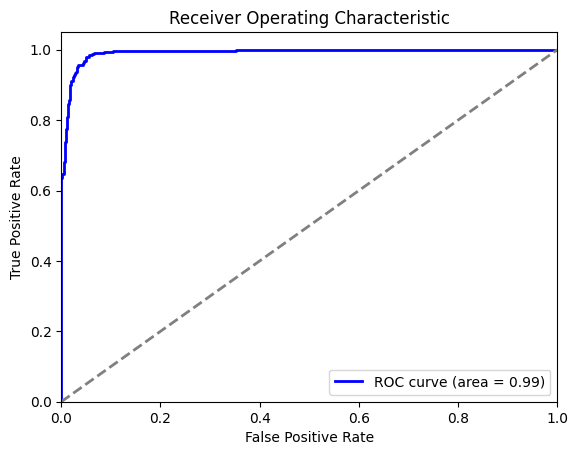

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob )  # Assumes class 1 is the positive class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

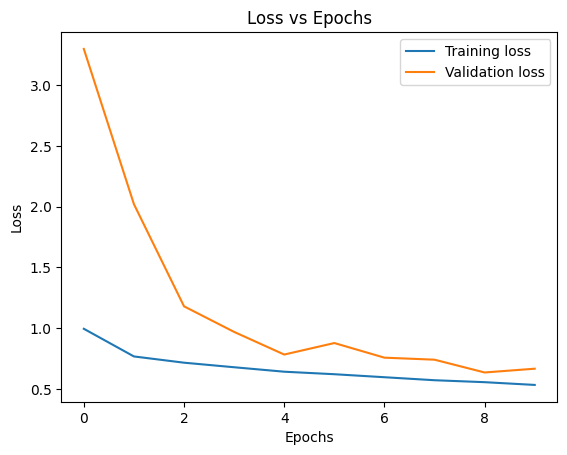

In [15]:
import matplotlib.pyplot as plt
# Plot loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

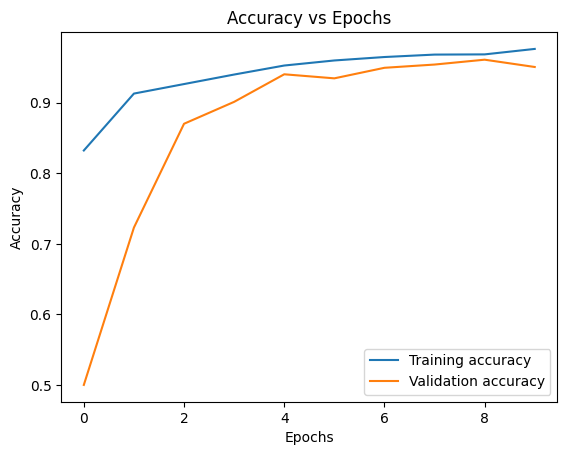

In [16]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step


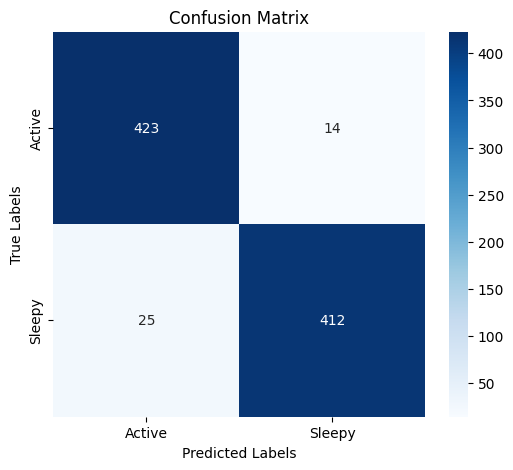

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have x_test and y_test as your test data
# And the model has already been trained

# Step 1: Make predictions on the test set
y_pred = model.predict(x_test)  # Predict probabilities (output between 0 and 1)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Visualize confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Active", "Sleepy"], yticklabels=["Active", "Sleepy"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [19]:
model.save('fatigue_model_cnn.h5')

### Real Time 

In [8]:
import cv2
import numpy as np
import tensorflow as tf

# Load the pre-trained model
new_model = tf.keras.models.load_model('fatigue_model_cnn.h5')

# Load Haar cascade classifiers for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Initialize video capture
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Initialize status
    status = "Unknown"

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)

        if len(eyes) > 0:  # If eyes are detected
            for (ex, ey, ew, eh) in eyes:
                roi_eye_color = roi_color[ey:ey + eh, ex:ex + ew]

                # Resize the detected eye region and prepare for prediction
                try:
                    final_image = cv2.resize(roi_eye_color, (224, 224))
                    final_image = np.expand_dims(final_image, axis=0)  # Add batch dimension

                    # Normalize image (if your model expects this)
                    final_image = final_image / 255.0  # If the model was trained with this normalization

                    # Make predictions
                    Predictions = new_model.predict(final_image)

                    # Get predicted class
                    predicted_class = np.argmax(Predictions, axis=1)[0]
                    confidence = np.max(Predictions)  # Get the confidence level

                    # Determine status based on predicted class
                    if predicted_class == 0:  # Assuming class 0 corresponds to "Active"
                        status = f"Active ({confidence * 100:.2f}%)"
                    elif predicted_class == 1:  # Assuming class 1 corresponds to "Sleepy"
                        status = f"Sleepy ({confidence * 100:.2f}%)"

                except Exception as e:
                    print(f"Error in processing: {e}")
                    status = "Error"

        else:
            # If no eyes detected, mark as "Sleepy"
            status = "Sleepy"

        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Display status text on video
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, status, (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Sleepiness Detection Window', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

### With Alarm

In [9]:
import cv2
import numpy as np
import tensorflow as tf
import winsound  # For playing a beep sound (Windows only)

# Load the pre-trained model
new_model = tf.keras.models.load_model('fatigue_model_cnn.h5')

# Load Haar cascade classifiers for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Initialize video capture
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# Initialize variables for consecutive sleepy frames
sleepy_count = 0
sleepy_threshold = 8  # Set threshold to 5 consecutive "Sleepy" frames
alarm_triggered = False  # Flag to track if the alarm has been triggered

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Initialize status
    status = "Unknown"

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)

        if len(eyes) > 0:  # If eyes are detected
            for (ex, ey, ew, eh) in eyes:
                roi_eye_color = roi_color[ey:ey + eh, ex:ex + ew]

                # Resize the detected eye region and prepare for prediction
                try:
                    final_image = cv2.resize(roi_eye_color, (224, 224))
                    final_image = np.expand_dims(final_image, axis=0)  # Add batch dimension

                    # Normalize image (if your model expects this)
                    final_image = final_image / 255.0  # If the model was trained with this normalization

                    # Make predictions
                    Predictions = new_model.predict(final_image)

                    # Get predicted class
                    predicted_class = np.argmax(Predictions, axis=1)[0]
                    confidence = np.max(Predictions)  # Get the confidence level

                    # Determine status based on predicted class
                    if predicted_class == 0:  # Assuming class 0 corresponds to "Active"
                        status = f"Active ({confidence * 100:.2f}%)"
                        if alarm_triggered:
                            # Reset alarm and threshold when status becomes Active
                            sleepy_count = 0
                            alarm_triggered = False  # Stop the alarm
                        else:
                            sleepy_count = 0  # Reset the sleepy count if active
                    elif predicted_class == 1:  # Assuming class 1 corresponds to "Sleepy"
                        status = f"Sleepy ({confidence * 100:.2f}%)"
                        sleepy_count += 1  # Increment sleepy count

                except Exception as e:
                    print(f"Error in processing: {e}")
                    status = "Error"

        else:
            # If no eyes detected, mark as "Sleepy"
            status = "Sleepy"
            sleepy_count += 1  # Increment sleepy count if no eyes detected

        # If the number of consecutive "Sleepy" frames exceeds the threshold, trigger alarm
        if sleepy_count >= sleepy_threshold and not alarm_triggered:
            winsound.Beep(1000, 1000)  # Beep sound (frequency 1000Hz, duration 1000ms)
            alarm_triggered = True  # Set the flag to indicate that the alarm has been triggered
            sleepy_count = 0  # Reset the count after the beep

        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Display status text on video
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, status, (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Sleepiness Detection Window', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

In [4]:
pip install pygame

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import numpy as np
# import tensorflow as tf
# from keras.models import Model
# from keras.layers import Dense, GlobalAveragePooling2D
# from keras.applications import ResNet50
# from keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# import os

# # Load your dataset paths
# dataset_path = 'your_dataset_path'  # Change this to your dataset path
# categories = ['Active', 'Sleepy']

# # Load dataset
# def load_data():
#     images = []
#     labels = []
#     for category in categories:
#         path = os.path.join(dataset_path, category)
#         class_num = categories.index(category)
#         for img in os.listdir(path):
#             img_array = tf.keras.preprocessing.image.load_img(os.path.join(path, img), target_size=(224, 224))
#             img_array = tf.keras.preprocessing.image.img_to_array(img_array)
#             images.append(img_array)
#             labels.append(class_num)
#     return np.array(images), np.array(labels)

# # Load images and labels
# X, y = load_data()

# # Split into training and validation sets
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# # Normalize the images
# X_train = X_train.astype('float32') / 255.0
# X_valid = X_valid.astype('float32') / 255.0

# # Data Augmentation
# datagen = ImageDataGenerator(rotation_range=20,
#                              width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              shear_range=0.2,
#                              zoom_range=0.2,
#                              horizontal_flip=True)

# # Build the ResNet model
# def create_model():
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(1, activation='sigmoid')(x)  # Binary classification
#     model = Model(inputs=base_model.input, outputs=x)
#     return model

# # Create and compile the model
# model = create_model()
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(datagen.flow(X_train, y_train, batch_size=32), 
#           validation_data=(X_valid, y_valid), 
#           epochs=10)

# # Save the trained model
# model.save('fatigue_model.h5')